# Var and CVar by a Non Parametric Approach

É preciso:
   * Definir um intervalo de confiança e pegar os n piores valores fora do intervalo
   * A partir disso o VaR seria o melhor valor entre os n valores
   * O CVaR seria a media dos n valores

In [18]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

## Puxando as companhias listadas no Ibovespa

```
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_companies_listed_on_Ibovespa')
tickers = table[0]['Ticker']

for i in range(len(tickers)):
    tickers[i] += '.SA'
    
tickers
```


In [2]:
## Input pelo teclado

#```
tickers = []
x='...'

while(x!='0'):
    x = str(input('Insira as ações para analise: \n'))
    print('Digite 0 para parar')
    if(x!='0'):
        tickers.append(x)
#```

Insira as ações para analise: 
MGLU3.SA
Digite 0 para parar
Insira as ações para analise: 
VALE3.SA
Digite 0 para parar
Insira as ações para analise: 
PETR4.SA
Digite 0 para parar
Insira as ações para analise: 
0
Digite 0 para parar


In [3]:
# Puxando valores históricos das ações a serem analisadas


mydata = pd.DataFrame()

for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2008-4-20')['Adj Close']
    
mydata.head()

,MGLU3.SA,VALE3.SA,PETR4.SA
Date,,,
2011-05-02,0.849938,34.241356,21.969473
2011-05-03,0.842187,33.459190,21.730392
2011-05-04,0.851488,32.837475,21.619392
2011-05-05,0.846321,33.251953,20.893627
2011-05-06,0.840121,33.258636,20.671621


In [4]:
# Descobrindo o número de ações analisadas

numbers_of_tickers = 0

for i in tickers:
    numbers_of_tickers += 1

#numbers_of_tickers

In [5]:
# Fazendo o log-retorno diário das ações analisadas

returns = np.log(mydata / mydata.shift(1))
returns.tail()

,MGLU3.SA,VALE3.SA,PETR4.SA
Date,,,
2020-09-21,0.017514,-0.027291,-0.035256
2020-09-22,0.008867,0.003770,-0.004796
2020-09-23,-0.034214,0.022069,-0.027786
2020-09-24,0.032088,-0.007473,0.008368
2020-09-28,-0.020706,0.002044,-0.038476


In [6]:
# Ordenação dos retornos em ordem crescente por merge_sort
returns_sorted = {}

for t in tickers:
    returns_sorted[t] = np.sort(returns[t],kind='mergesort')

#returns_sorted

## Testando se esta ordenado

```
for t in tickers:
    print('Piores 10 resultados ação: %s' %t)
    for i in range(10):
        print(returns_sorted[t][i])
    print('\n')
```

In [7]:
# Definindo intervalo de confianca do V.a.R. ou C.V.a.R.

conf = input('Coloque o intervalo de confianca: \n')
desconf = round((1-int(conf)/int(100)),3)
#desconf

Coloque o intervalo de confianca: 
99


In [8]:
# Descobrindo quantos dados tem para a analise

number_of_returns = len(returns)

#number_of_returns

In [9]:
# Index o qual acaba o intervalo de confiança
# A soma acontece pois o retorno de posicao 0 é sempre n.a.n.

position_desconf = int(round(number_of_returns*desconf,0))

#position_desconf

In [10]:
# Soma das piores posicoes fora do intervalo de confiança

sum_desconf = {}

for t in tickers:
    sum_temp=0
    for i in range(position_desconf):
        sum_temp += returns_sorted[t][i]
    sum_desconf[t] = sum_temp
    
        
#sum_desconf

In [11]:
# V.a.R.

var = {}

for t in tickers:
    var[t] = returns_sorted[t][position_desconf]

#var

In [12]:
# C.V.a.R.

cvar = {}

for t in tickers:
    cvar[t] = (1/position_desconf)*sum_desconf[t]
    
#cvar

In [13]:
# Transformando C.V.a.R. em um modo apresentavel

cvar_str = {}

for t in tickers:
    cvar_str[t] = str(np.abs(round(cvar[t]*100,2))) + '%'
    
#cvar_str

In [14]:
# Transformando V.a.R. em um modo apresentavel

var_str = {}

for t in tickers:
    var_str[t] = str(np.abs(round(var[t]*100,2))) + '%'
    
#var_str

In [15]:
# Apresentação dos resultados V.a.R.

for t in tickers:
    print("O V.a.R." + "("+ "%s" %conf + ")" + " da ação %s é:" %t, end=' ')
    print(var_str[t])
    

O V.a.R.(99) da ação MGLU3.SA é: 9.06%
O V.a.R.(99) da ação VALE3.SA é: 7.26%
O V.a.R.(99) da ação PETR4.SA é: 8.93%


In [16]:
# Apresentação dos resultados C.V.a.R.

for t in tickers:
    print("O C.V.a.R." + "("+ "%s" %conf + ")" + " da ação %s é:" %t, end=' ')
    print(cvar_str[t])

O C.V.a.R.(99) da ação MGLU3.SA é: 13.55%
O C.V.a.R.(99) da ação VALE3.SA é: 10.84%
O C.V.a.R.(99) da ação PETR4.SA é: 13.65%


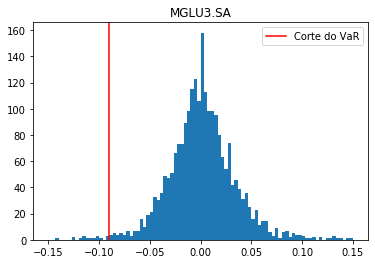

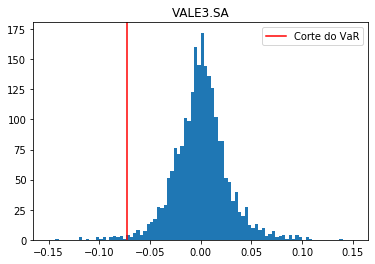

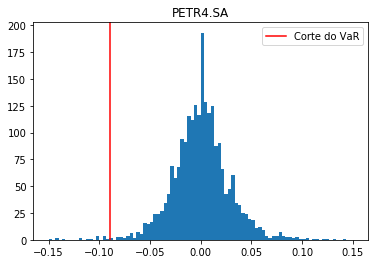

In [17]:
# Representação gráfica do corte do VaR

begin = -0.15
end = 0.15

sep = 90

x=[]

for i in range(int(sep)+1):
    x.append(begin + (i * (end-begin) / sep))
    
for t in tickers:
    plt.hist(returns[t],bins=x)
    plt.axvline(x=var[t],color='red', label='Corte do VaR')
    #plt.axvline(x=0,color='green', label = 'Eixo 0')
    plt.title(t)
    plt.legend()
    plt.show()